 # TP 3

##  Application de l'algorithme de Grover’s :
##### Implémentation de l’algorithme quantique de Grover’s à l’aide de Qiskit, et l’exécutons sur un simulateur.

In [1]:
# initialisation
import matplotlib.pyplot as plt
import numpy as np

# importation Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# importer les outils plot
from qiskit.visualization import plot_histogram

### Cas de 2 qubits :
###### Construire un circuit quantique pour trouver l’élément ω = |11i.
###### Montrer le circuit quantique.
###### Exécuter l’algorithme dans le simulateur d’IBM.
###### Afficher les résultats dans un histogramme.

In [2]:
# préparer un circuit quantique à deux qubits
n = 2
grover_circuit = QuantumCircuit(n)

# initialiser l'état | s ⟩ .
# fonction "initialiser_s" générale (pour n'importe quel nombre de qubits) pour l'utiliser plus tard: 
def initialiser_s(qc, qubits):
    """Appliquer H gate aux 'qubits' dans qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialiser_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [3]:
# appliquer l'Oracle pour | w ⟩ = | 11 ⟩
grover_circuit.cz(0,1)
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [4]:
# appliquer le diffuseur ( U s ). Comme pour le circuit qui initialise | s ⟩ 
# Opérateur de diffusion (Us) 
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [19]:
# executer dans le simulateur
# Charger le compte IBM Q et obtenir le périphérique le moins occupé
provider = IBMQ.load_account()
provider = IBMQ.get_provider()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2021-03-29 16:33:06,782: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_belem


In [ ]:
# Exécuter le circuit sur ibmq_belem. 
# Surveiller l'exécution du travail dans la file d'attente

from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = device.run(qobj)
job_monitor(job, interval=2)

![](captures/queu.PNG)

In [ ]:
# une fois qu'on a Job Status: job has successfully run
# afficher les resultat dans un histogramme
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

![](captures/ccc.PNG)
         Dans la majorité des cas, l'Etat | 11 ⟩ est mesuré. Les autres résultats sont dus à des erreurs de calcul  quantique 

### Cas de 3 qubits :
##### Construisez un circuit quantique pour trouver l’élément ω = | 101 ⟩ et | 110 ⟩
##### Montrez le circuit quantique.
##### Exécutez l’algorithme dans le simulateur d’IBM.
##### Afficher les résultats dans un histogramme.

In [9]:
# créer l'oracle
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle= qc.to_gate()

In [14]:
# créér un diffuseur général
def diffuseur(nqubits):
    qc = QuantumCircuit(nqubits)
    # |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)

    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    # |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # retourner le diffuseur en tant que porte
    Us = qc.to_gate()
    return Us


In [15]:
# execution
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialiser_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuseur(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌─────────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0            ├─░─┤M├──────
        ├───┤│             ││             │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 circuit164 ├┤1 circuit174 ├─░──╫─┤M├───
        ├───┤│             ││             │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2            ├─░──╫──╫─┤M├
        └───┘└─────────────┘└─────────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════╩══╩══╩═
                                               0  1  2

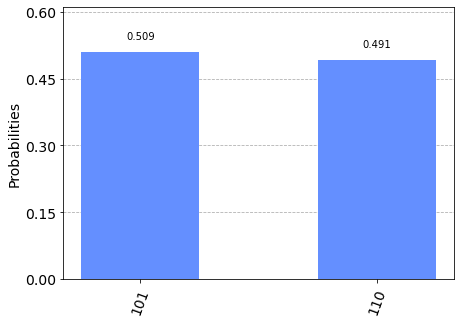

In [16]:
#simulation
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
qobj = assemble(transpiled_grover_circuit)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

l'algorithme découvre nos états marqués | 101 ⟩ et | 110 ⟩

In [17]:
#simulation IBM
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [ ]:
# Exécuter le circuit sur ibmq_belem. 
# Surveiller l'exécution du travail dans la file d'attente
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = device.run(qobj)
job_monitor(job, interval=2)

![](captures/c.PNG)

In [ ]:
# une fois qu'on a Job Status: job has successfully run
# afficher les resultats dans un histograme
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

![](captures/cc.PNG)

il y a une plus grande chance de mesurer | 101 ⟩ et | 110 ⟩ . Les autres résultats sont dus à des erreurs de calcul quantique.